# ARTEMIS

Quick start

In [2]:
from artemis import DataModel, ARTEMIS

In [3]:
r = DataModel(
    path='examples/6ugg/6ugg.cif', fmt='.cif',
    res='/B',
)

q = DataModel(
    path='examples/1ivs.pdb', fmt='.pdb',
    res='/C', resneg=None, seed=None
)

artemis = ARTEMIS(r, q, 
                  matchrange=3.5, toplargest=100, stepdiv=0, shift=5)
artemis.run()

In [4]:
print(artemis.show(verbose=False, permutation=True))


 ********************************************************************
 * ARTEMIS (Version 20231004)                                       *
 * using ARTEM to Infer Sequence alignment                          *
 * Reference: TODO                                                  *
 * Please email comments and suggestions to dbohdan@iimcb.gov.pl    *
 ********************************************************************

Name of structure r: examples/6ugg/6ugg.cif:B
Name of structure q: examples/1ivs.pdb:C (to be superimposed onto structure r)
Length of structure r: 77 residues
Length of structure q: 75 residues

Aligned length= 70, RMSD=   2.21, Seq_ID=n_identical/n_aligned= 0.629
TM-score= 0.72618 (normalized by length of structure r: L=77, d0=2.75)
TM-score= 0.74090 (normalized by length of structure q: L=75, d0=2.68)

(":" denotes residue pairs of d < 5.0 Angstrom, "." denotes other aligned residues)
GGAGCGGUAGUUCAGUCGGUUAGAAUACCUGCC----UGUCAC-GCAGGGGGUCGCGGGUUCGAGUCCCGUCCGUUCCGCCA
::

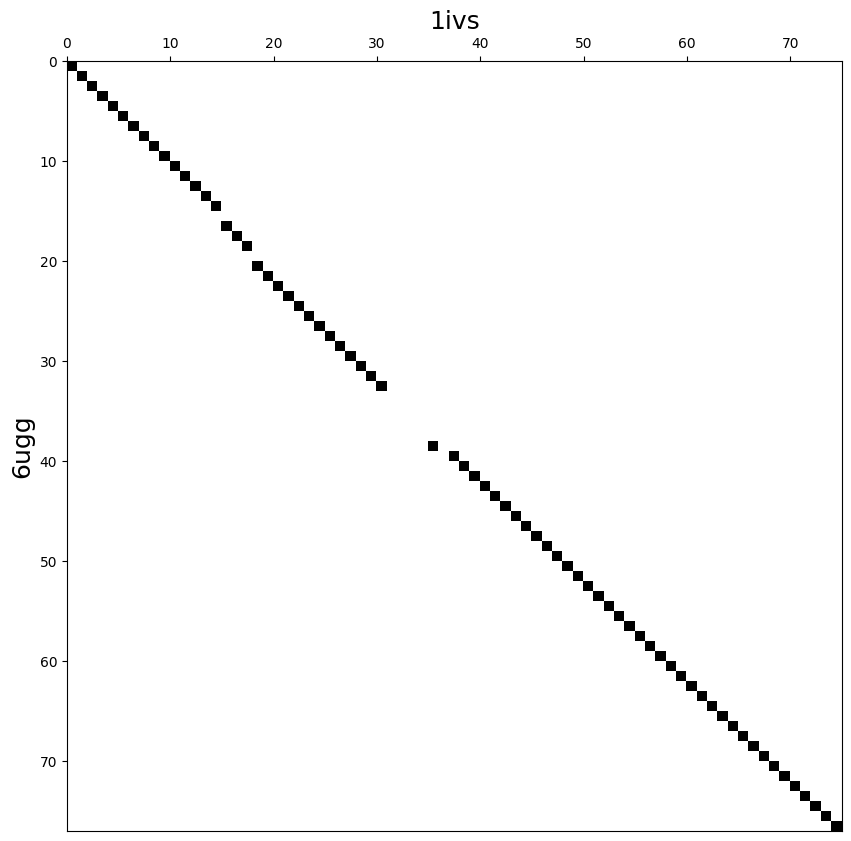

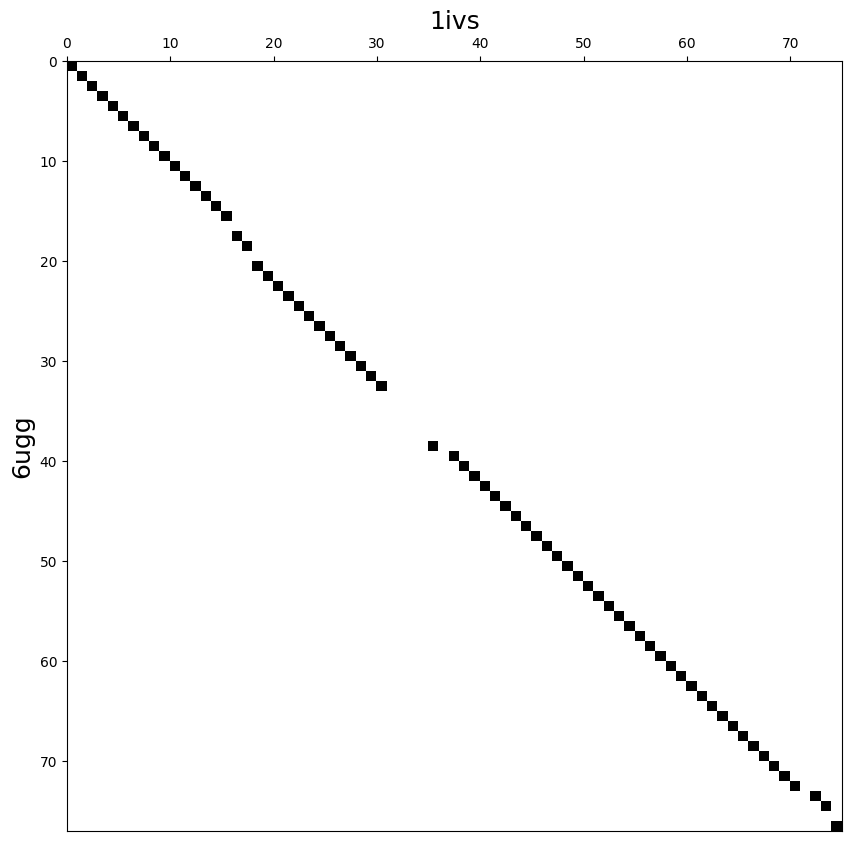

In [5]:
artemis.save(saveto='myfolder', saveres='#', saveformat='.pdb', permutation=True)

In [5]:
r.to_pdb(f'myfolder/{r}.pdb')

In [6]:
artemis.get_config()

{'r': 'examples/6ugg/6ugg.cif',
 'rformat': '.cif',
 'rres': '/B',
 'rresneg': '',
 'rseed': '/B',
 'q': 'examples/1ivs.pdb',
 'qformat': '.pdb',
 'qres': '/C',
 'qresneg': '',
 'qseed': '/C',
 'matchrange': 3.5,
 'toplargest': 100,
 'shift': 5,
 'stepdiv': 0,
 'threads': 8}

In [7]:
artemis.get_alignment()

{'rName': 'examples/6ugg/6ugg.cif',
 'qName': 'examples/1ivs.pdb',
 'rChain': 'B',
 'qChain': 'C',
 'rLength': 77,
 'qLength': 75,
 'aliLength': 70,
 'RMSD': 2.2095782757833984,
 'Seq_ID': 0.6285714285714286,
 'rTMscore': 0.726178534326508,
 'r_d0': 2.7478567053607703,
 'qTMscore': 0.7409035246741379,
 'q_d0': 2.6788029504896205,
 'rAlignment': 'GGAGCGGUAGUUCAGUCGGUUAGAAUACCUGCC----UGUCAC-GCAGGGGGUCGCGGGUUCGAGUCCCGUCCGUUCCGCCA',
 'distances': '::::::::::::::: ::: :::::::::::..         : ::::::::::::::::::::::::::::::::::....',
 'qAlignment': 'GGGCGGCUAGCUCAG-CGG-AAGAGCGCUCGCCUCAC-----ACGCGAGAGGUCGUAGGUUCAAGUCCUACGCCGCCCACCA',
 'transform': (array([[-0.28373483,  0.82758307, -0.48435608],
         [-0.95558695, -0.28600113,  0.07111216],
         [-0.07967517,  0.48302135,  0.87197606]]),
  array([231.7795176 , -99.49733299,  37.22959065]))}

In [8]:
artemis.get_permutation()

{'p_aliLength': 69,
 'p_rTMscore': 0.7270370126256864,
 'p_qTMscore': 0.7417983533358273,
 'p_RMSD': 1.9779515394562477,
 'p_Seq_ID': 0.6086956521739131,
 'transform': (array([[-0.28592922,  0.82786421, -0.48258194],
         [-0.95507534, -0.28716947,  0.0732448 ],
         [-0.07794605,  0.48184494,  0.87278283]]),
  array([231.95026095, -99.44385234,  36.9045758 ]))}

In [9]:
artemis.get_distance_1().head() # distance table for alignment without permutations

,6ugg,distance,1ivs
0,1.B.G.0.,3.236392,1.C.G.901.
1,1.B.G.1.,1.941278,1.C.G.902.
2,1.B.A.2.,1.094817,1.C.G.903.
3,1.B.G.3.,0.913835,1.C.C.904.
4,1.B.C.4.,0.893825,1.C.G.905.


In [10]:
artemis.get_distance_2().head() # distance table for alignment with permutations

,6ugg,distance,1ivs
0,1.B.G.0.,3.278961,1.C.G.901.
1,1.B.G.1.,1.974291,1.C.G.902.
2,1.B.A.2.,1.106263,1.C.G.903.
3,1.B.G.3.,0.899626,1.C.C.904.
4,1.B.C.4.,0.881424,1.C.G.905.


In [11]:
r.atom_site.head()

,group_PDB,id,type_symbol,label_atom_id,label_alt_id,label_comp_id,label_asym_id,label_entity_id,label_seq_id,pdbx_PDB_ins_code,...,occupancy,B_iso_or_equiv,pdbx_formal_charge,auth_seq_id,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num,auth_alt_id,auth_entity_id
0,ATOM,1,O,OP3,.,G,A,1,1,?,...,1.0,87.03,?,0,G,A,OP3,1,.,1
1,ATOM,2,P,P,.,G,A,1,1,?,...,1.0,89.03,?,0,G,A,P,1,.,1
2,ATOM,3,O,OP1,.,G,A,1,1,?,...,1.0,87.01,?,0,G,A,OP1,1,.,1
3,ATOM,4,O,OP2,.,G,A,1,1,?,...,1.0,88.40,?,0,G,A,OP2,1,.,1
4,ATOM,5,O,O5',.,G,A,1,1,?,...,1.0,83.89,?,0,G,A,O5',1,.,1
